# Hotel Review Analysis
Using Basic NLP | By Subham Pramanick

### Introduction

In the dynamic landscape of the hospitality industry, understanding customer sentiment and preferences is paramount for ensuring a positive and memorable guest experience. This Hotel Reviews Analysis project aims to dissect and interpret the wealth of information embedded in customer reviews, unraveling the nuances of their sentiments and emotions. By employing advanced natural language processing techniques, sentiment analysis, and emotion analysis, we seek to provide actionable insights for hotel businesses to enhance customer satisfaction, identify areas for improvement, and refine strategies to cater to diverse guest expectations.

###Business Problem

The hospitality sector thrives on delivering exceptional customer experiences, making customer feedback a crucial asset. However, with the abundance of online reviews, discerning meaningful insights from the vast pool of data becomes a challenge. The business problem at hand is how to effectively extract actionable information from hotel reviews to pinpoint specific aspects that contribute to positive experiences and identify potential areas requiring attention. This project endeavors to address this challenge, offering a systematic and data-driven approach to deciphering the sentiments and emotions expressed in customer reviews, ultimately guiding hotels in refining their services for heightened customer satisfaction and loyalty.



---



### Loading and Previewing Data

To kick off our analysis, we start by loading the data from an Excel file into a pandas DataFrame.

Let's take a sneak peek at the first few rows of the dataset to ensure it's loaded correctly.

In [ ]:
import pandas as pd

file_path = '/content/Data Analyst - Test Data.xlsx'

# Load the data into a pandas DataFrame
df = pd.read_excel(file_path, sheet_name='US')

# Display the first few rows of the DataFrame to check if the data is loaded correctly
print(df.head(20))

                                               Review       Date     Location
0   I was very impressed with the resort.\n Great ... 2019-08-20    Sebastian
1   The rooms were nice the outside needs work als... 2019-08-20  Los Angeles
2   Great location! I have stayed at this hotel on... 2019-08-20      Georgia
3   The hotel was adequate for my stay. The strips... 2019-08-20          NaN
4   Great location, room was large and spacious. P... 2019-08-19  Palm Harbor
5   All the options for fun were great! Do wish th... 2019-08-19          NaN
6   Old. Musty. Motel. \n Bath need an update asap... 2019-08-19          NaN
7   Loved the layout of the hotel and the relaxing... 2019-08-19          NaN
8   My wife and I loved everything about it. It’s ... 2019-08-19          NaN
9   rooms were very small, was told i had a compli... 2019-08-19          NaN
10  Very clean and friendly and I love the locatio... 2019-08-19   California
11  Nice and comfortable good position near the st... 2019-08-19

### Location Analysis and Visualization

Now, let's start by focusing to the 'Location' column, exploring the geographical distribution of reviews.

In [ ]:
df['Location'].nunique()

1082

<ipython-input-92-89fe587eb38e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['Location'] = df_loc['Location'].replace(mapping)


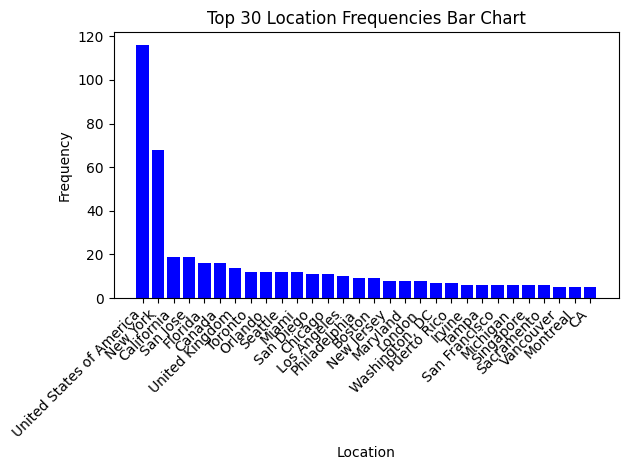

In [ ]:
# Remove 'nan' values
df_loc = df.dropna(subset=['Location'])

# Map variations of 'New York' to a single value
mapping = {'NY': 'New York', 'New York, NY': 'New York', 'NYC': 'New York'}
df_loc['Location'] = df_loc['Location'].replace(mapping)

# Get top 30 unique values and their frequencies
top_locations = df_loc['Location'].value_counts().nlargest(30)

# Create a bar chart for the top 30 values
plt.bar(top_locations.index, top_locations.values, color='blue')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Top 30 Location Frequencies Bar Chart')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the bar chart
plt.show()

In [ ]:
from tabulate import tabulate

# Create a DataFrame for the table
table_data = pd.DataFrame({'Location': top_locations.index, 'Frequency': top_locations.values})

# Print the table
print(tabulate(table_data, headers='keys', tablefmt='plain', showindex=False))

Location                    Frequency
United States of America          116
New York                           68
California                         19
San Jose                           19
Florida                            16
Canada                             16
United Kingdom                     14
Toronto                            12
Orlando                            12
Seattle                            12
Miami                              12
San Diego                          11
Chicago                            11
Los Angeles                        10
Philadelphia                        9
Boston                              9
New Jersey                          8
Maryland                            8
London                              8
Washington, DC                      7
Puerto Rico                         7
Irvine                              6
Tampa                               6
San Francisco                       6
Michigan                            6
Singapore   



---



### Language Detection in Reviews

In the next step of our analysis, we address the issue of reviews in different languages. This task involves identifying the languages present in the 'Review' column and exploring how many different languages there are.


In [ ]:
pip install langdetect

In [ ]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

# Assuming df is your DataFrame with 'Review' column
# Add a new column 'Language' to store the detected language
def detect_language(text):
    try:
        return detect(text) if isinstance(text, str) and len(text) > 3 else None
    except LangDetectException:
        return None

df['Language'] = df['Review'].apply(detect_language)

# Display the DataFrame with the detected languages
print(df[['Review', 'Language']])

                                                 Review Language
0     I was very impressed with the resort.\n Great ...       en
1     The rooms were nice the outside needs work als...       en
2     Great location! I have stayed at this hotel on...       en
3     The hotel was adequate for my stay. The strips...       en
4     Great location, room was large and spacious. P...       en
...                                                 ...      ...
6443  ·the staff were all so friendly. frank, the ch...       en
6444         ·the internet barely worked or didn't work       en
6445  ·the location was great.\n \n \n \n \n ·the be...       en
6446  ·we were early for check in and the staff was ...       en
6447  ·staff, free coffee, location and activities.\...       en

[6448 rows x 2 columns]


In [ ]:
num_unique_languages = df['Language'].nunique()
print("Number of Unique Languages:", num_unique_languages)

Number of Unique Languages: 32


So, surprisingly there are reviews in **32 different languages**, we have to translate them English to get correct analysis of these reviews.

In [ ]:
df['Language'].unique()

array(['en', 'es', 'ja', 'fr', None, 'it', 'no', 'de', 'nl', 'zh-cn',
       'sv', 'pl', 'pt', 'ro', 'da', 'af', 'zh-tw', 'ko', 'tl', 'sw',
       'fi', 'so', 'vi', 'ca', 'sk', 'et', 'hu', 'cs', 'id', 'ru', 'cy',
       'he', 'ar'], dtype=object)

I tried translating using Google Translate library, but there was an error exception. So, I uploaded the data into Google sheets and performed transation there. Translated file uploaded again.

In [ ]:
file_path1 = '/content/lang_detected_data1.xlsx'

# Load the data into a pandas DataFrame
ldf = pd.read_excel(file_path1)

# Display the first few rows of the DataFrame to check if the data is loaded correctly
print(ldf.head())

                                              Review       Date     Location  \
0  I was very impressed with the resort.\n Great ... 2019-08-20    Sebastian   
1  The rooms were nice the outside needs work als... 2019-08-20  Los Angeles   
2  Great location! I have stayed at this hotel on... 2019-08-20      Georgia   
3  The hotel was adequate for my stay. The strips... 2019-08-20          NaN   
4  Great location, room was large and spacious. P... 2019-08-19  Palm Harbor   

  Language                                  Translated_Review  
0       en  I was very impressed with the resort.\n Great ...  
1       en  The rooms were nice the outside needs work als...  
2       en  Great location! I have stayed at this hotel on...  
3       en  The hotel was adequate for my stay. The strips...  
4       en  Great location, room was large and spacious. P...  




---



### Tokenization of Translated Reviews

Continuing our exploration, we delve into the realm of natural language processing by tokenizing the 'Translated_Review' column. Tokenization involves breaking down text into individual words or tokens, allowing us to perform more granular analysis on the textual content.

In [ ]:
ldf.columns

Index(['Review', 'Date', 'Location', 'Language', 'Translated_Review'], dtype='object')

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Assuming ldf is your DataFrame with the correct column name
nltk.download('punkt')

# Tokenize the correct column
ldf['Tokenized_Column'] = ldf['Translated_Review'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])

# Display the DataFrame with the tokenized entries
print(ldf[['Tokenized_Column']])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                       Tokenized_Column
0     [I, was, very, impressed, with, the, resort, ....
1     [The, rooms, were, nice, the, outside, needs, ...
2     [Great, location, !, I, have, stayed, at, this...
3     [The, hotel, was, adequate, for, my, stay, ., ...
4     [Great, location, ,, room, was, large, and, sp...
...                                                 ...
6443  [·the, staff, were, all, so, friendly, ., fran...
6444  [·the, internet, barely, worked, or, did, n't,...
6445  [·the, location, was, great, ., ·the, bed, was...
6446  [·we, were, early, for, check, in, and, the, s...
6447  [·staff, ,, free, coffee, ,, location, and, ac...

[6448 rows x 1 columns]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


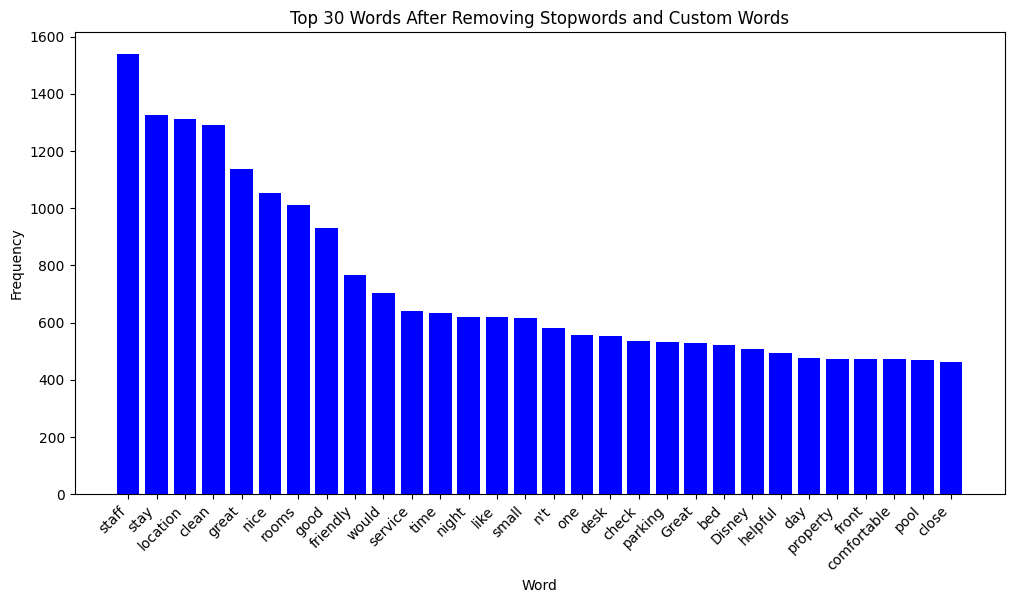

In [ ]:
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming ldf is your DataFrame with the tokenized column
nltk.download('stopwords')

# Define additional custom stop words
custom_stopwords = ['.', '!',"'",'hotel','room',"(",")",',','’','$','us','get','could']

# Define a function to remove stop words (including custom stop words)
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english') + custom_stopwords)
    return [word for word in tokens if word.lower() not in stop_words]

# Apply the remove_stopwords function to the 'Tokenized_Column'
ldf['Cleaned_Tokens'] = ldf['Tokenized_Column'].apply(remove_stopwords)

# Flatten the list of tokens
all_tokens = [token for sublist in ldf['Cleaned_Tokens'] for token in sublist]

# Calculate word frequencies
word_freq = Counter(all_tokens)

# Plot a frequency bar graph for the top 30 words
top_words = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:30])

plt.figure(figsize=(12, 6))
plt.bar(top_words.keys(), top_words.values(), color='blue')
plt.title('Top 30 Words After Removing Stopwords and Custom Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Create a DataFrame with top words and their frequencies
top_words_df = pd.DataFrame(list(top_words.items()), columns=['Word', 'Frequency'])

# Display the new DataFrame
print(top_words_df)

           Word  Frequency
0         staff       1538
1          stay       1324
2      location       1312
3         clean       1292
4         great       1138
5          nice       1052
6         rooms       1011
7          good        930
8      friendly        765
9         would        704
10      service        642
11         time        635
12        night        621
13         like        620
14        small        616
15          n't        582
16          one        557
17         desk        553
18        check        535
19      parking        531
20        Great        530
21          bed        522
22       Disney        506
23      helpful        495
24          day        475
25     property        474
26        front        473
27  comfortable        472
28         pool        470
29        close        463




---



### Sentiment Analysis Using VADER Method

Now, let's dive into the emotional tone of our translated reviews by performing sentiment analysis using the VADER (Valence Aware Dictionary and sEntiment Reasoner) method. This method is particularly effective for analyzing sentiments in text data.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
# Assuming ldf is your DataFrame
nltk.download('vader_lexicon')

# Initialize the VADER Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Apply VADER Sentiment Analysis to 'Translated_Review'
ldf['Sentiment_Scores'] = ldf['Translated_Review'].apply(lambda x: sia.polarity_scores(x) if isinstance(x, str) else None)

# Extract compound scores to determine overall sentiment
ldf['Sentiment_Compound'] = ldf['Sentiment_Scores'].apply(lambda x: x['compound'] if x else None)

# Categorize sentiment based on compound score
ldf['Sentiment_Category'] = pd.cut(ldf['Sentiment_Compound'], bins=[-1, -0.05, 0.05, 1], labels=['Negative', 'Neutral', 'Positive'])

# Display the DataFrame with sentiment analysis results
print(ldf[['Translated_Review', 'Sentiment_Scores', 'Sentiment_Compound', 'Sentiment_Category']])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                      Translated_Review  \
0     I was very impressed with the resort.\n Great ...   
1     The rooms were nice the outside needs work als...   
2     Great location! I have stayed at this hotel on...   
3     The hotel was adequate for my stay. The strips...   
4     Great location, room was large and spacious. P...   
...                                                 ...   
6443  ·the staff were all so friendly. frank, the ch...   
6444         ·the internet barely worked or didn't work   
6445  ·the location was great.\n \n \n \n \n ·the be...   
6446  ·we were early for check in and the staff was ...   
6447  ·staff, free coffee, location and activities.\...   

                                       Sentiment_Scores  Sentiment_Compound  \
0     {'neg': 0.0, 'neu': 0.607, 'pos': 0.393, 'comp...              0.9421   
1     {'neg': 0.075, 'neu': 0.546, 'pos': 0.379, 'co...              0.8360   
2     {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'comp..



---



### Visualizing Sentiment Distribution

To further enhance our understanding of the dataset, we visualize the distribution of sentiments among the translated reviews. This visual representation provides a clear overview of the emotional tone captured by the VADER sentiment analysis.

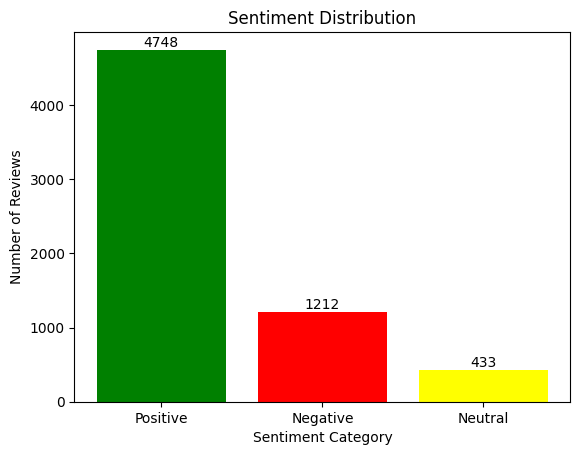

In [ ]:
import matplotlib.pyplot as plt

# Plotting a bar chart for sentiment distribution
sentiment_counts = ldf['Sentiment_Category'].value_counts()

fig, ax = plt.subplots()
bars = ax.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'yellow'])

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

### Extracting Business Insights from Sentiment Analysis

1. **Highly Positive Sentiments:**
   Abundant positive sentiments signify general customer satisfaction. Identify specific positive aspects for reinforcement and promotion.

2. **Significant Negative Sentiments:**
   Discernible negative sentiments warrant close examination. Analyze for areas of improvement to enhance customer satisfaction.

3. **Low Neutral Sentiments, Mostly 'nan':**
   Scarcity of neutral sentiments and prevalence of 'nan' values offer an opportunity for exploration. Investigate to understand feedback between extreme positive and negative sentiments.

### Business Recommendations:

- **Focus on Critical Negatives:**
  Allocate resources to address concerns raised in negative sentiments proactively.

- **Explore Selected Positives and Neutrals:**
  Analyze carefully selected positive sentiments and neutrals to reinforce successful practices and understand subtleties for future improvements.

By coupling sentiment analysis with a strategic business perspective, actionable insights contribute to continual enhancement of services and guest experiences.



---



### Unveiling Insights through Word Clouds

To delve deeper into the sentiments expressed in reviews, we utilize word clouds, offering a visually compelling representation of frequently used words. Focusing on both positive sentiments and carefully selected neutral entries, we gain nuanced insights into what guests appreciate and areas that can be improved.


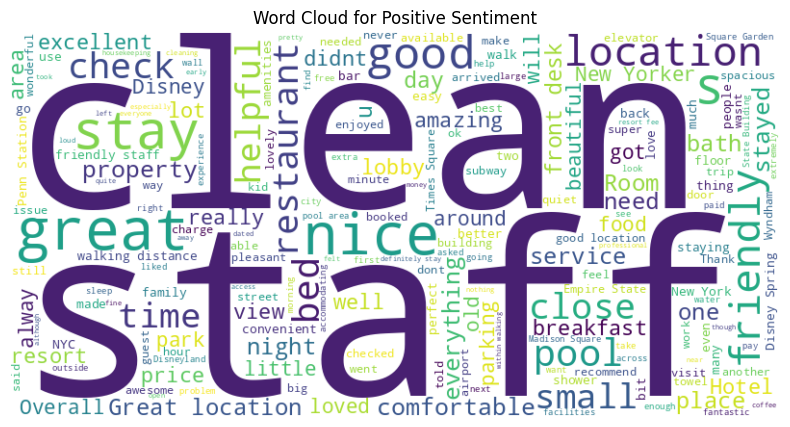

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming ldf is your DataFrame with sentiment analysis results
# Continue from the previous code...

# Function to generate word cloud for a specific sentiment
def generate_word_cloud(sentiment_category, stopwords=None, color='white'):
    sentiment_reviews = ldf[ldf['Sentiment_Category'] == sentiment_category]['Translated_Review']

    # Combine all reviews into a single string
    text = ' '.join(sentiment_reviews)

    # Remove specified stopwords
    if stopwords:
        for stopword in stopwords:
            text = text.replace(stopword, '')

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color=color, random_state=42).generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment_category} Sentiment')
    plt.show()

# Specify the stopwords to be removed (if any)
custom_stopwords = ['.', '!',"'",'hotel','room',"(",")",',','’','$']

# Generate word clouds for each sentiment category
generate_word_cloud('Positive', stopwords=custom_stopwords, color='white')

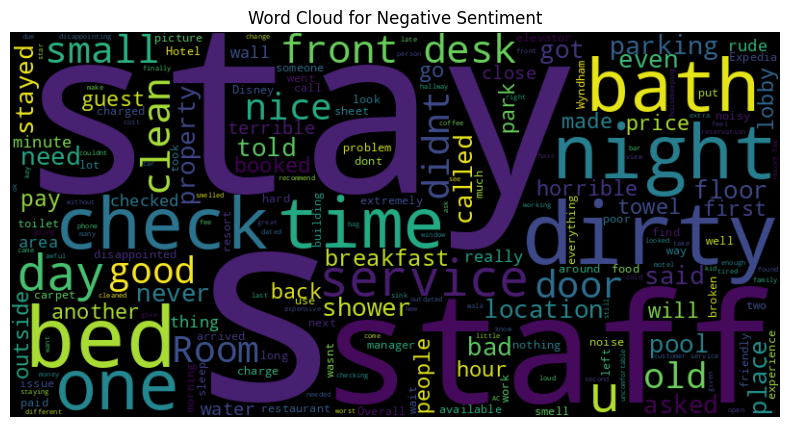

In [ ]:
generate_word_cloud('Negative', stopwords=custom_stopwords, color='black')

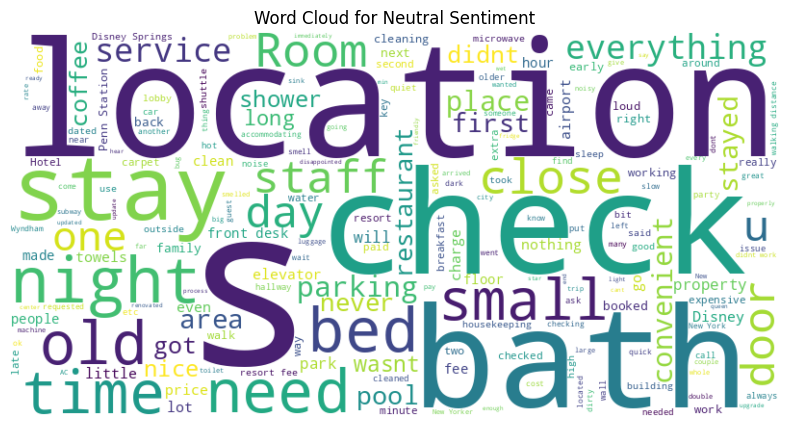

In [ ]:
generate_word_cloud('Neutral', stopwords=custom_stopwords)



---



### Emotion Analysis with NRCLex

Taking our analysis a step further, we delve into the nuanced emotions behind the reviews using the NRCLex library. We would use NRCLex library for this. `NRCLex` is a Python library for sentiment and emotion analysis, providing sentiment scores, categorizing emotions, and quantifying their intensity. It aids in nuanced understanding of customer feedback.

In [ ]:
pip install nrclex

In [ ]:
# Replace NaN values with an empty string
ldf['Translated_Review'] = ldf['Translated_Review'].fillna('')

# Apply NRCLex analysis to 'Translated_Review'
ldf['NRCLex'] = ldf['Translated_Review'].apply(lambda x: NRCLex(x) if isinstance(x, str) else None)

# Extract emotion scores and top emotions
ldf['Emotion_Scores'] = ldf['NRCLex'].apply(lambda x: x.affect_frequencies if x else None)
ldf['Top_Emotions'] = ldf['NRCLex'].apply(lambda x: x.top_emotions if x else None)

# Display the DataFrame with NRCLex analysis results
print(ldf[['Translated_Review', 'Emotion_Scores', 'Top_Emotions']])

                                      Translated_Review  \
0     I was very impressed with the resort.\n Great ...   
1     The rooms were nice the outside needs work als...   
2     Great location! I have stayed at this hotel on...   
3     The hotel was adequate for my stay. The strips...   
4     Great location, room was large and spacious. P...   
...                                                 ...   
6443  ·the staff were all so friendly. frank, the ch...   
6444         ·the internet barely worked or didn't work   
6445  ·the location was great.\n \n \n \n \n ·the be...   
6446  ·we were early for check in and the staff was ...   
6447  ·staff, free coffee, location and activities.\...   

                                         Emotion_Scores  \
0     {'fear': 0.125, 'anger': 0.125, 'anticip': 0.0...   
1     {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...   
2     {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...   
3     {'fear': 0.0, 'anger': 0.07142857142857142, 'a...

In [ ]:
sorted_affect_frequencies = dict(sorted(text_object.affect_frequencies.items(), key=lambda x: x[1], reverse=True))
sorted_affect_frequencies

{'positive': 0.2635163225308336,
 'trust': 0.15904816581870013,
 'joy': 0.14271573654306813,
 'anticipation': 0.11575238057529745,
 'negative': 0.11032803436739057,
 'surprise': 0.05190742977055411,
 'sadness': 0.04733434957337715,
 'anger': 0.04293944133193436,
 'disgust': 0.03537703165521747,
 'fear': 0.031081107833626987,
 'anticip': 0.0}

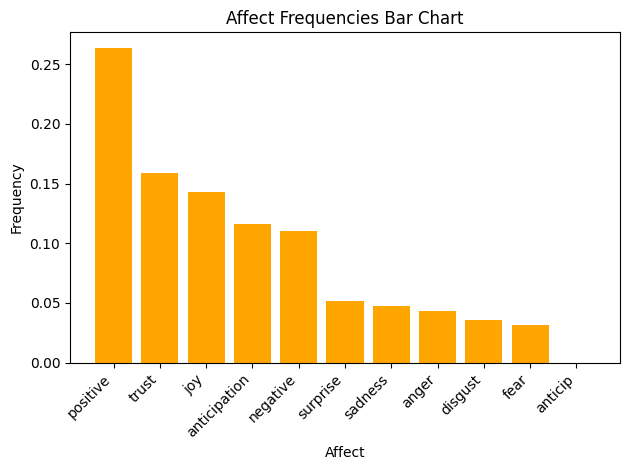

In [ ]:
# Create a bar chart
plt.bar(sorted_affect_frequencies.keys(), sorted_affect_frequencies.values(), color='orange')
plt.xlabel('Affect')
plt.ylabel('Frequency')
plt.title('Affect Frequencies Bar Chart')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the bar chart
plt.show()

In [ ]:
sentiment_words = pd.DataFrame(list(text_object.affect_dict.items()),columns = ['words','sentiments'])
sentiment_words

,words,sentiments
0,main,[positive]
1,pool,[positive]
2,blast,"[anger, fear, negative, surprise]"
3,professional,"[positive, trust]"
4,breakfast,[positive]
...,...,...
1457,sore,"[anger, negative, sadness]"
1458,gear,[positive]
1459,degrading,"[disgust, fear, negative, sadness]"
1460,frank,"[positive, trust]"


In [ ]:
ldf.to_excel('processed_data.xlsx', index=False, sheet_name='ProcessedData')